# Intermediate Regression with statsmodels in Python

## Chapter 1: Parallel Slopes

In [25]:
import numpy as np
import pandas as pd
from itertools import product
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
taiwan_real_estate = pd.read_csv("taiwan_real_estate2.csv")
taiwan_real_estate

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847
...,...,...,...,...
409,4082.01500,0,0 to 15,4.659607
410,90.45606,9,0 to 15,15.128593
411,390.96960,7,15 to 30,12.284418
412,104.81010,5,0 to 15,15.885023


In [27]:
# Fit a linear regression of price_twd_msq vs. n_convenience
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


In [28]:
# Fit a linear regression of price_twd_msq vs. house_age_years, no intercept
mdl_price_vs_age = ols("price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_age.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


In [29]:
# Fit a linear regression of price_twd_msq vs. n_convenience plus house_age_years, no intercept
mdl_price_vs_both = ols("price_twd_msq ~ n_convenience + house_age_years + 0", data=taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_both.params)

house_age_years[0 to 15]     9.413325
house_age_years[15 to 30]    7.085169
house_age_years[30 to 45]    7.510958
n_convenience                0.791457
dtype: float64


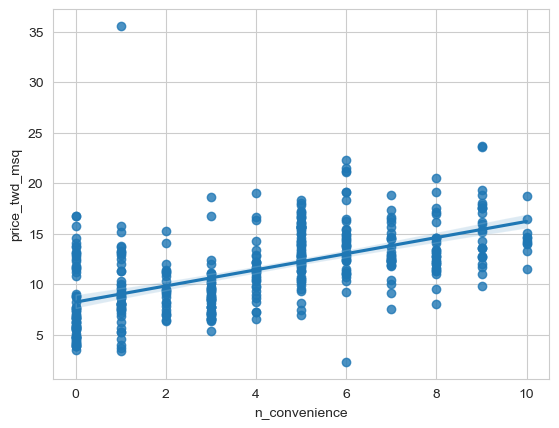

In [30]:
# Create a scatter plot with linear trend line of price_twd_msq vs. n_convenience
sns.regplot(
    x="n_convenience",
    y="price_twd_msq",
    data=taiwan_real_estate
)

# Show the plot
plt.show()

E:\Anaconda3\envs\dc-statistics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Anaconda3\envs\dc-statistics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Anaconda3\envs\dc-statistics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


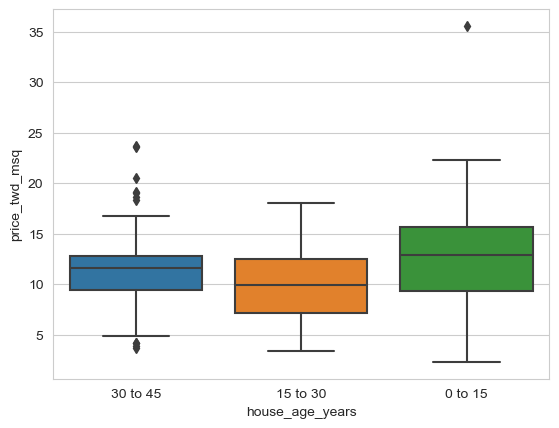

In [31]:
# Create a boxplot of price_twd_msq vs. house_age_years
sns.boxplot(
    x="house_age_years",
    y="price_twd_msq",
    data=taiwan_real_estate
)

# Show the plot
plt.show()

In [32]:
print(mdl_price_vs_both.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     89.29
Date:                Sun, 22 Oct 2023   Prob (F-statistic):           1.75e-44
Time:                        19:33:57   Log-Likelihood:                -1068.7
No. Observations:                 414   AIC:                             2145.
Df Residuals:                     410   BIC:                             2162.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
house_age_years[0 to 1

In [33]:
# Extract the model coefficients, coeffs
coeffs = mdl_price_vs_both.params

# Print coeffs
print(coeffs)

# Assign each of the coeffs
ic_0_15, ic_15_30, ic_30_45, slope = coeffs

house_age_years[0 to 15]     9.413325
house_age_years[15 to 30]    7.085169
house_age_years[30 to 45]    7.510958
n_convenience                0.791457
dtype: float64


E:\Anaconda3\envs\dc-statistics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Anaconda3\envs\dc-statistics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Anaconda3\envs\dc-statistics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Anaconda3\envs\dc-statistics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

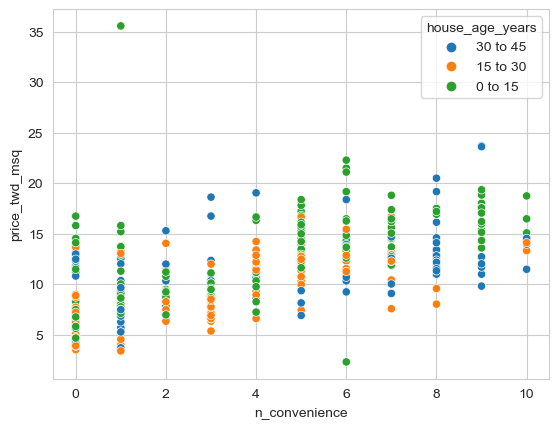

In [34]:
# Draw a scatter plot of price_twd_msq vs. n_convenience, colored by house_age_years
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                hue="house_age_years",
                data=taiwan_real_estate)

plt.show()

E:\Anaconda3\envs\dc-statistics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Anaconda3\envs\dc-statistics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Anaconda3\envs\dc-statistics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Anaconda3\envs\dc-statistics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

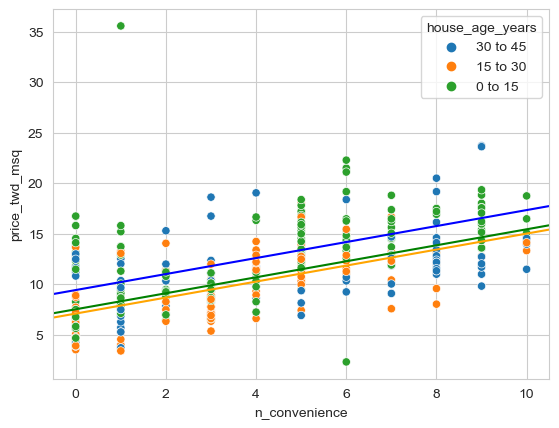

In [35]:
# Draw a scatter plot of price_twd_msq vs. n_convenience, colored by house_age_years
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                hue="house_age_years",
                data=taiwan_real_estate)

# Add three parallel lines for each category of house_age_years
# Color the line for ic_0_15 blue
plt.axline(xy1=(0, ic_0_15), slope=slope, color="blue")
# Color the line for ic_15_30 orange
plt.axline(xy1=(0, ic_15_30), slope=slope, color="orange")
# Color the line for ic_30_45 green
plt.axline(xy1=(0, ic_30_45), slope=slope, color="green")

# Show the plot
plt.show()

The "parallel slope" model name comes from the fact that the prediction for each category is a slope, and all those slopes are parallel. The plot allows us to see that newer houses are on average more expensive than houses older than 15 years.

In [36]:
# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0, 11, 1)

# Extract the unique values of house_age_years
house_age_years = taiwan_real_estate["house_age_years"].unique()

# Create p as all combinations of values of n_convenience and house_age_years
p = product(n_convenience, house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=["n_convenience", "house_age_years"])

print(explanatory_data)

    n_convenience house_age_years
0               0        30 to 45
1               0        15 to 30
2               0         0 to 15
3               1        30 to 45
4               1        15 to 30
5               1         0 to 15
6               2        30 to 45
7               2        15 to 30
8               2         0 to 15
9               3        30 to 45
10              3        15 to 30
11              3         0 to 15
12              4        30 to 45
13              4        15 to 30
14              4         0 to 15
15              5        30 to 45
16              5        15 to 30
17              5         0 to 15
18              6        30 to 45
19              6        15 to 30
20              6         0 to 15
21              7        30 to 45
22              7        15 to 30
23              7         0 to 15
24              8        30 to 45
25              8        15 to 30
26              8         0 to 15
27              9        30 to 45
28            

In [37]:
# Add predictions to the DataFrame
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_both.predict(explanatory_data))

print(prediction_data)

    n_convenience house_age_years  price_twd_msq
0               0        30 to 45       7.510958
1               0        15 to 30       7.085169
2               0         0 to 15       9.413325
3               1        30 to 45       8.302415
4               1        15 to 30       7.876627
5               1         0 to 15      10.204782
6               2        30 to 45       9.093873
7               2        15 to 30       8.668084
8               2         0 to 15      10.996239
9               3        30 to 45       9.885330
10              3        15 to 30       9.459541
11              3         0 to 15      11.787696
12              4        30 to 45      10.676787
13              4        15 to 30      10.250998
14              4         0 to 15      12.579153
15              5        30 to 45      11.468244
16              5        15 to 30      11.042455
17              5         0 to 15      13.370610
18              6        30 to 45      12.259701
19              6   

By adding combinations of explanatory variables, you increase the number of predictions as well.

In [38]:
# Extract the model coefficients, coeffs
coeffs = mdl_price_vs_both.params

# Print coeffs
print(coeffs)

# Assign each of the coeffs
ic_0_15, ic_15_30, ic_30_45, slope  = coeffs

house_age_years[0 to 15]     9.413325
house_age_years[15 to 30]    7.085169
house_age_years[30 to 45]    7.510958
n_convenience                0.791457
dtype: float64


E:\Anaconda3\envs\dc-statistics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Anaconda3\envs\dc-statistics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Anaconda3\envs\dc-statistics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Anaconda3\envs\dc-statistics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

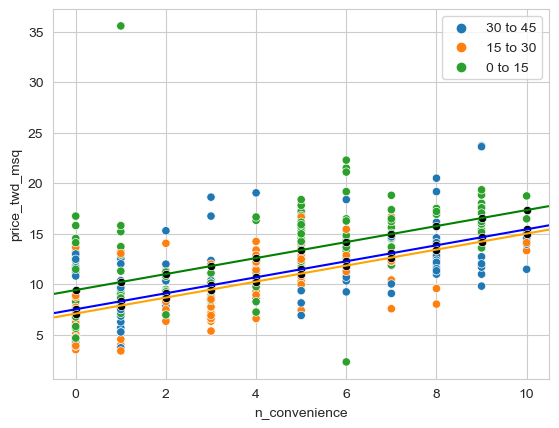

In [39]:
# Extract the model coefficients, coeffs
coeffs = mdl_price_vs_both.params

# Assign each of the coeffs
ic_0_15, ic_15_30, ic_30_45, slope = coeffs

# Create the parallel slopes plot
plt.axline(xy1=(0, ic_0_15), slope=slope, color="green")
plt.axline(xy1=(0, ic_15_30), slope=slope, color="orange")
plt.axline(xy1=(0, ic_30_45), slope=slope, color="blue")
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                hue="house_age_years",
                data=taiwan_real_estate)

# Add the predictions in black
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                color="black",
                data=prediction_data)

plt.show()

 Your predictions lie exactly on the trend lines.

In [40]:
# Define conditions
conditions = [
    explanatory_data["house_age_years"] == "0 to 15",
    explanatory_data["house_age_years"] == "15 to 30",
    explanatory_data["house_age_years"] == "30 to 45"
]

# Define choices
choices = [ic_0_15, ic_15_30, ic_30_45]

# Create array of intercepts for each house_age_year category
intercept = np.select(conditions, choices)

# Create prediction_data with columns intercept and price_twd_msq
prediction_data = explanatory_data.assign(
    intercept = intercept,
    price_twd_msq = intercept + slope * explanatory_data["n_convenience"])

print(prediction_data)

    n_convenience house_age_years  intercept  price_twd_msq
0               0        30 to 45   7.510958       7.510958
1               0        15 to 30   7.085169       7.085169
2               0         0 to 15   9.413325       9.413325
3               1        30 to 45   7.510958       8.302415
4               1        15 to 30   7.085169       7.876627
5               1         0 to 15   9.413325      10.204782
6               2        30 to 45   7.510958       9.093873
7               2        15 to 30   7.085169       8.668084
8               2         0 to 15   9.413325      10.996239
9               3        30 to 45   7.510958       9.885330
10              3        15 to 30   7.085169       9.459541
11              3         0 to 15   9.413325      11.787696
12              4        30 to 45   7.510958      10.676787
13              4        15 to 30   7.085169      10.250998
14              4         0 to 15   9.413325      12.579153
15              5        30 to 45   7.51

Even for more complicated linear regression models, the prediction just involves adding and multiplying coefficients for different conditions of explanatory variables.

In [41]:
# Print the coeffs of determination for mdl_price_vs_conv
print("rsquared_conv: ", mdl_price_vs_conv.rsquared)
print("rsquared_adj_conv: ", mdl_price_vs_conv.rsquared_adj)

# Print the coeffs of determination for mdl_price_vs_age
print("rsquared_age: ", mdl_price_vs_age.rsquared)
print("rsquared_adj_age: ", mdl_price_vs_age.rsquared_adj)

# Print the coeffs of determination for mdl_price_vs_both
print("rsquared_both: ", mdl_price_vs_both.rsquared)
print("rsquared_adj_both: ", mdl_price_vs_both.rsquared_adj)

rsquared_conv:  0.32604660851305045
rsquared_adj_conv:  0.32441079931041217
rsquared_age:  0.08382749316665172
rsquared_adj_age:  0.07936923279276686
rsquared_both:  0.39517387968887374
rsquared_adj_both:  0.3907483227109875


In [42]:
# Print the RSE for mdl_price_vs_conv
print("rse_conv: ", np.sqrt(mdl_price_vs_conv.mse_resid))

# Print the RSE for mdl_price_vs_age
print("rse_age: ", np.sqrt(mdl_price_vs_age.mse_resid))

# Print RSE for mdl_price_vs_both
print("rse_both: ", np.sqrt(mdl_price_vs_both.mse_resid))

rse_conv:  3.383887521343046
rse_age:  3.950183875630859
rse_both:  3.213460280552323
